Форма массива X: (26, 2)


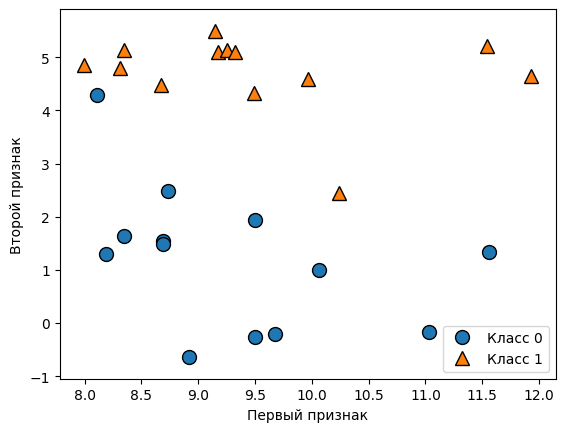

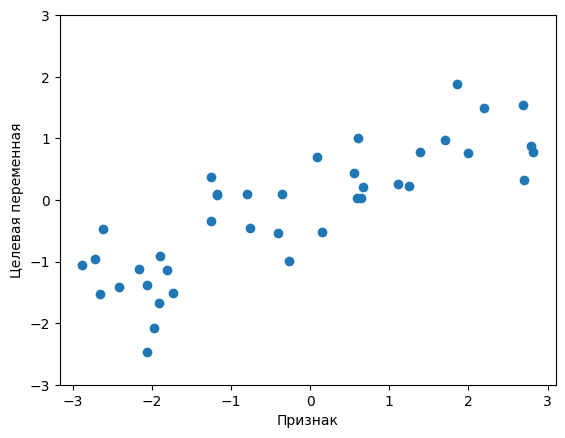

Ключи cancer(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Форма массива data для набора cancer: (569, 30)
Количество примеров для каждого класса:
{'malignant': 212, 'benign': 357}
Имена признаков:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Форма массива data для набора boston: (506, 13)
Форма массива X: (506, 104)


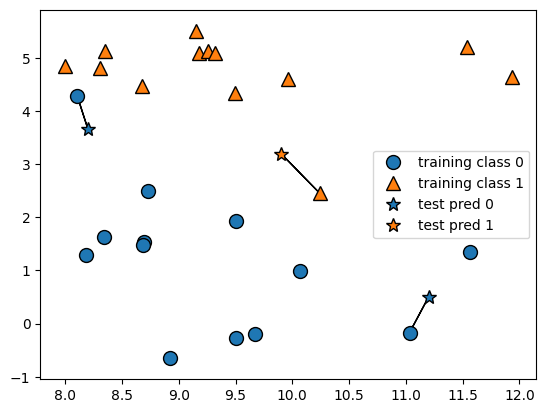

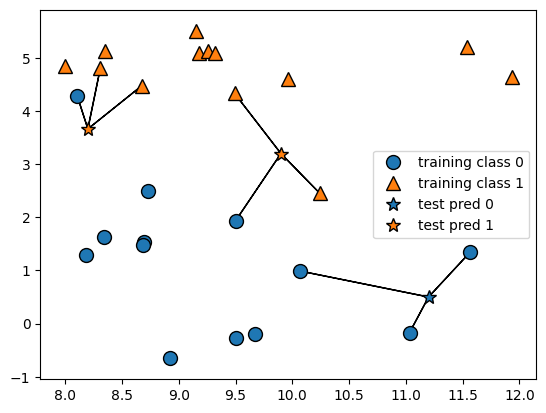

Прогнозы на тестовом наборе: [1 0 1 0 1 0 0]
Правильность на тестовом наборе: 0.86


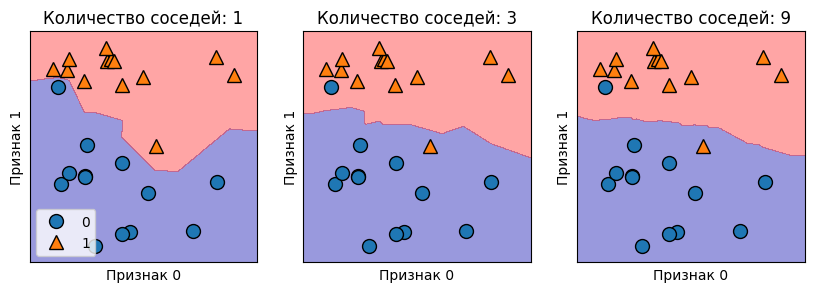

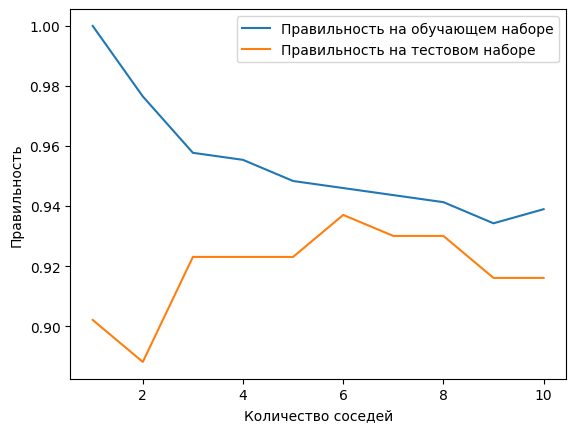

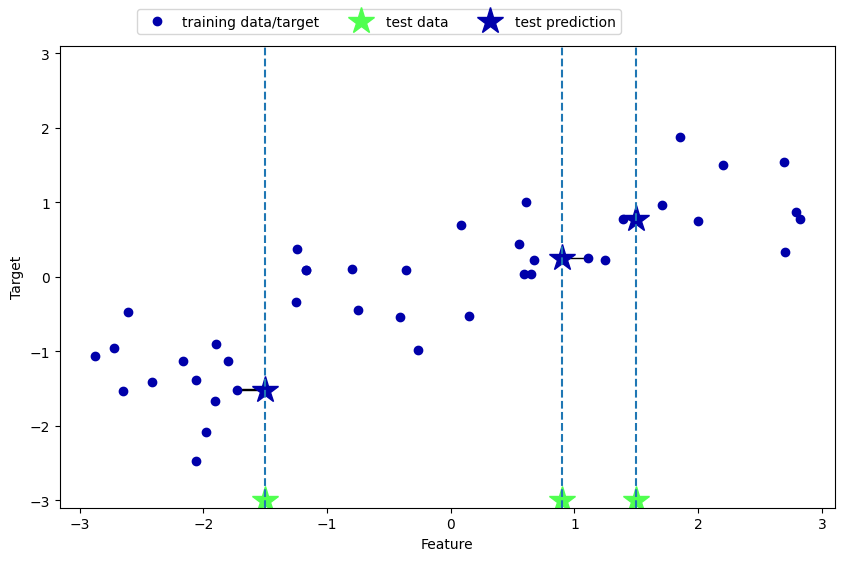

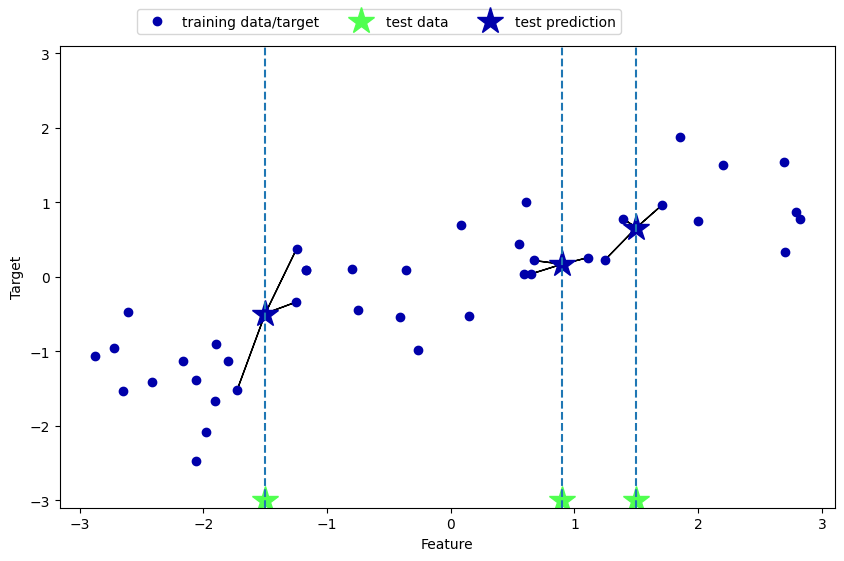

Прогнозы для тестового набора:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
R^2 на тестовом наборе: 0.83


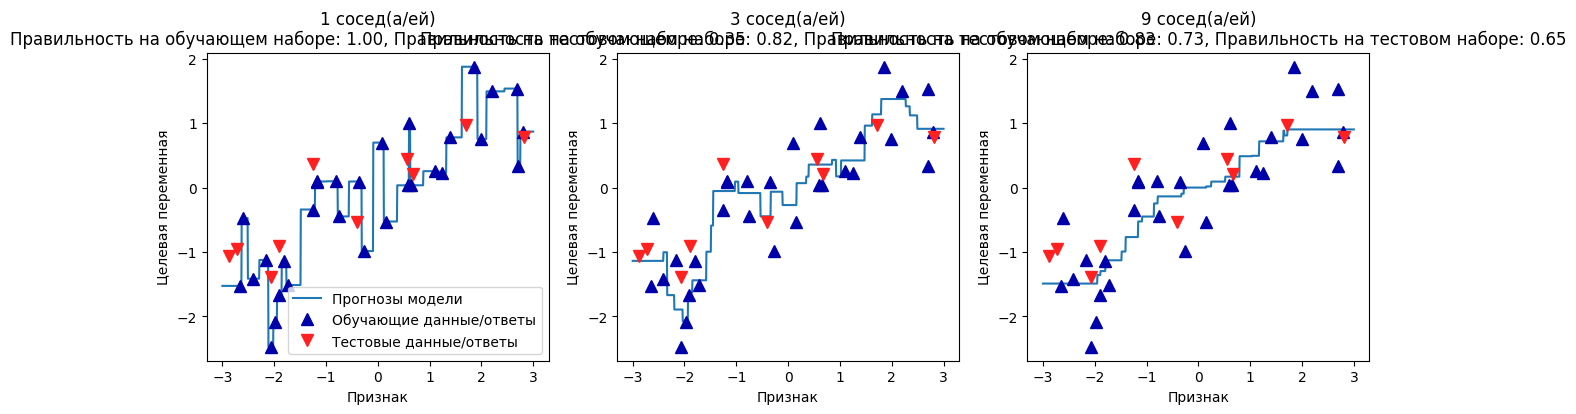

In [2]:
import sklearn
import mglearn
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings("ignore")

X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Класс 0", "Класс 1"], loc=4)
plt.xlabel("Первый признак")
plt.ylabel("Второй признак")
print("Форма массива X: {}".format(X.shape))
plt.show()

X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Признак")
plt.ylabel("Целевая переменная")
plt.show()

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("Ключи cancer(): \n{}".format(cancer.keys()))

print("Форма массива data для набора cancer: {}".format(cancer.data.shape))

print("Количество примеров для каждого класса:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print("Имена признаков:\n{}".format(cancer.feature_names))

import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X_boston, y_boston = data, target
print("Форма массива data для набора boston: {}".format(X_boston.shape))

X, y = mglearn.datasets.load_extended_boston()
print("Форма массива X: {}".format(X.shape))

mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.show()

mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.show()

from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train, y_train)

print("Прогнозы на тестовом наборе: {}".format(clf.predict(X_test)))

print("Правильность на тестовом наборе: {:.2f}".format(clf.score(X_test, y_test)))

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("Количество соседей: {}".format(n_neighbors))
    ax.set_xlabel("Признак 0")
    ax.set_ylabel("Признак 1")
axes[0].legend(loc=3)
plt.show()

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="Правильность на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="Правильность на тестовом наборе")
plt.ylabel("Правильность")
plt.xlabel("Количество соседей")
plt.legend()
plt.show()

mglearn.plots.plot_knn_regression(n_neighbors=1)
plt.show()
mglearn.plots.plot_knn_regression(n_neighbors=3)
plt.show()

from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

print("Прогнозы для тестового набора:\n{}".format(reg.predict(X_test)))

print("R^2 на тестовом наборе: {:.2f}".format(reg.score(X_test, y_test)))

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} сосед(а/ей)\nПравильность на обучающем наборе: {:.2f}, Правильность на тестовом наборе: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Признак")
    ax.set_ylabel("Целевая переменная")
axes[0].legend(["Прогнозы модели", "Обучающие данные/ответы", "Тестовые данные/ответы"], loc="best")
plt.show()